In [510]:
projects['has_ai'],projects['has_chronic'] = [querier(corpus_tokenised.tokenised,keys,
                                                     intersect=True) for keys in [ai_expanded,chronic_expanded]]

In [509]:
ai_expanded = similarity_chaser(seed_list=ai_seed,model=w2v,similarity=0.8)
chronic_expanded = similarity_chaser(seed_list=chronic_seed,model=w2v,similarity=0.8)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


In [511]:
projects.loc[(projects['has_ai']>0) & (projects['has_chronic']>0)].head()

,index,title,year,abstract,status,grant_category,funder,amount,biological_sciences,physics,...,ip,tech,spin,pubs,has_ai,has_chronic,has_age,has_inclusion,has_ai_n,has_chronic_n
128,0091583C-0CA2-4FEC-A961-A59FC3C1B37D,Human-Robot Interaction for dementia preventio...,2016.0,There is an increasing trend in the incidence ...,Active,Studentship,MRC,0.0,0.000018,1.289251e-05,...,0.0,0.0,0.0,0.0,3,1,0,0,3,1
409,01B6A723-34E3-4F13-9318-5257D1FC1D54,Non-invasive assessment and management of coro...,2018.0,The main aim is to improve and test software c...,Active,Fellowship,MRC,284559.0,0.000366,1.280349e-07,...,0.0,0.0,0.0,0.0,1,2,0,0,1,4
534,023A35CA-0C1D-49DC-A15A-583AC19121ED,SAMS - Software Architecture for Mental health...,2013.0,SAMS is a proposed 3-year project to that will...,Closed,Research Grant,EPSRC,248496.0,0.000086,6.664651e-09,...,0.0,4.0,0.0,20.0,1,1,0,0,2,3
545,0248EE56-D9BA-4D29-A438-BA2BD05A3168,Micromechanical measurements in living embryos,2013.0,The embryo is a complex system wherein local t...,Closed,Research Grant,BBSRC,585065.0,0.469256,2.409735e-09,...,0.0,2.0,0.0,4.0,1,3,0,0,1,3
619,0283F735-409F-49A2-9DEB-2DCF4E8884D5,VIRTUAL REALITY ASSESSMENT AND REHABILITATION ...,2017.0,"The proposed PhD project will use innovative, ...",Active,Studentship,EPSRC,0.0,0.000403,5.355883e-06,...,0.0,0.0,0.0,0.0,1,1,0,0,1,1


In [512]:
#What's the size of the potential and effective mission field?

#This means potential mission field dataframe
pmf_df = projects.loc[(projects.has_ai==True)|(projects.has_chronic==True),:]

#Active mission field
amf_df = projects.loc[(projects.has_ai==True)&(projects.has_chronic==True),:]

#Solution mission field
smf_df = projects.loc[(projects.has_ai==True),:]

#Challenge mission field
cmf_df = projects.loc[(projects.has_chronic==True),:]

print(len(pmf_df), len(amf_df), len(smf_df),len(cmf_df))


7289 119 2544 4864


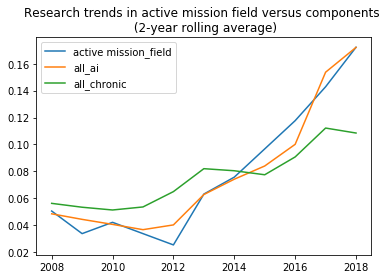

In [515]:
trends = pd.concat([df.year.value_counts(normalize=1) for df in [amf_df,smf_df,cmf_df]],axis=1)

trends.columns =['active mission_field','all_ai','all_chronic']
trends = trends.loc[(trends.index>2006) & (trends.index<2019)]

trends.rolling(window=2).mean().plot(title='Research trends in active mission field versus components \n (2-year rolling average)')

Recent period is relatively more important for AI and the active mission field. This suggests a diffusion of AI into the treatment of chronic diseases.

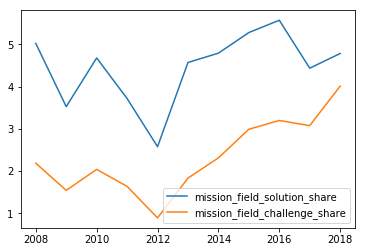

In [516]:
trends_as_share = pd.concat([df.year.value_counts() for df in [amf_df,smf_df,cmf_df]],axis=1)

trends_as_share.columns = ['mission','solution','challenge']

trends_as_share['mission_field_solution_share'],trends_as_share['mission_field_challenge_share'] = [
    trends_as_share['mission']/trends_as_share[x] for x in ['solution','challenge']]

(100*trends_as_share.loc[(trends_as_share.index>2006) & (trends_as_share.index<2019),
                   ['mission_field_solution_share','mission_field_challenge_share']]).rolling(window=2).mean().plot()


This one picks up the mission active field as a share of solution and challenge

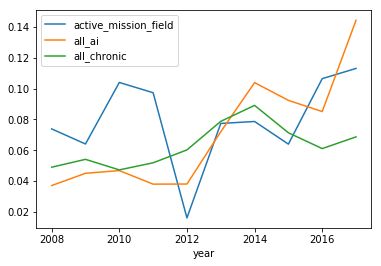

In [517]:
funding_trends = pd.concat([df.groupby('year')['amount'].sum() for df in [amf_df,smf_df,cmf_df]],axis=1)

funding_shares = funding_trends.apply(lambda x: x/x.sum(),axis=0)
funding_shares = funding_shares.loc[(funding_shares.index>2006) & (funding_shares.index<2018)]

funding_shares.columns = ['active_mission_field','all_ai','all_chronic']

funding_shares.rolling(window=2).mean().plot()

In [518]:
# for a in amf_df.loc[amf_df.year>2014].sort_values('amount',ascending=False)['abstract'][:5]:
#     print(a[:1000])
    
#     print('=====')
#     print('=====')
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


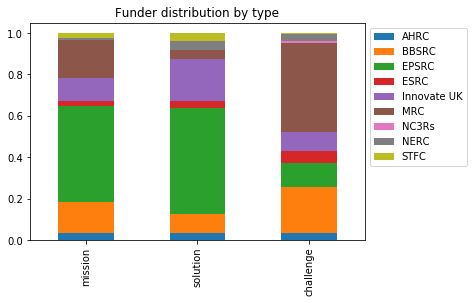

In [519]:
funders = pd.concat([df['funder'].value_counts(normalize=1) for df in [amf_df,smf_df,cmf_df]],axis=1)

funders.columns = ['mission','solution','challenge']

fig,ax = plt.subplots()

funders.T.plot.bar(stacked=True,ax=ax,title='Funder distribution by type')
ax.legend(bbox_to_anchor=(1,1))

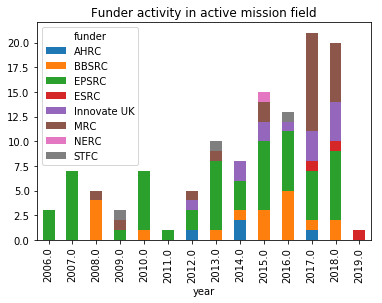

In [520]:
pd.crosstab(amf_df['year'],amf_df['funder']).plot.bar(stacked=True,title='Funder activity in active mission field')

In [521]:


discs = ['biological_sciences', 'physics', 'engineering_technology',
       'medical_sciences', 'social_sciences', 'mathematics_computing',
       'environmental_sciences', 'arts_humanities']



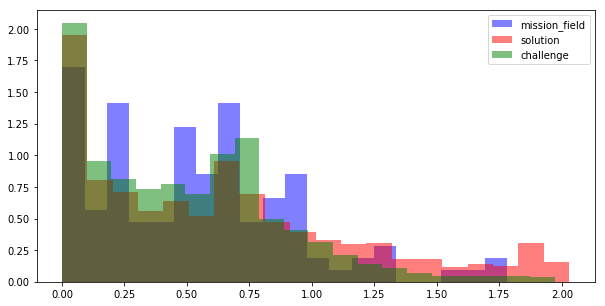

In [522]:
amf_ent,sol_ent,chal_ent = [df[discs].apply(entropy,axis=1) for df in [amf_df,smf_df,cmf_df]]

fig,ax = plt.subplots(figsize=(10,5))

ax.hist(amf_ent,bins=20,color='blue',alpha=0.5,density=True)
ax.hist(sol_ent,bins=20,color='red',alpha=0.5,density=True)
ax.hist(chal_ent,bins=20,color='green',alpha=0.5,density=True)
ax.legend(['mission_field','solution','challenge'])

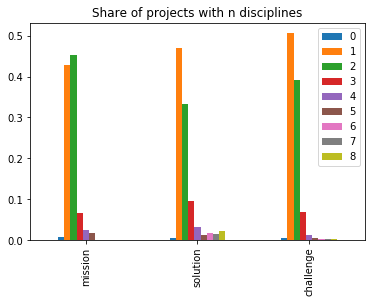

In [523]:
disc_distr = pd.concat([df[discs].applymap(lambda x: x>0.1).sum(axis=1).value_counts(normalize=True) 
                                  for df in [amf_df,smf_df,cmf_df]],axis=1).fillna(0)


disc_distr.columns = ['mission','solution','challenge']

disc_distr.T.plot.bar(title='Share of projects with n disciplines')

It does seem that the mission field tends to combine projects with multiple disciplines

Several of the projects that we identify are quite broad and only set out to do chronic diseases among many other things. We need a better filter

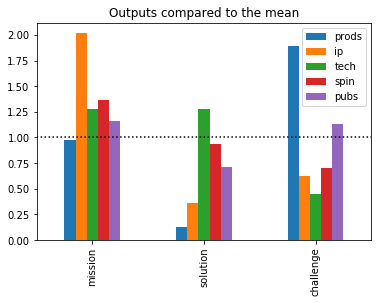

In [524]:
imps = ['prods', 'ip', 'tech', 'spin', 'pubs']


imps_share = pd.concat([df[imps].mean() for df in [amf_df,smf_df,cmf_df]],axis=1)
imps_share.columns = ['mission','solution','challenge']

fig,ax = plt.subplots()

(imps_share.T/imps_share.T.mean()).plot.bar(ax=ax,title='Outputs compared to the mean')

ax.hlines(y=1,xmin=-1,xmax=3,linestyles=':')

ax.legend(bbox_to_anchor=(1,1))

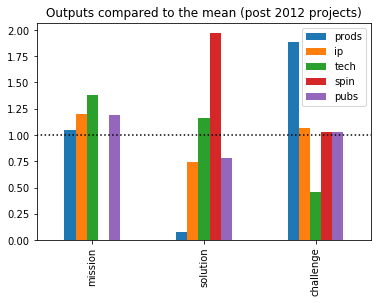

In [525]:
imps_share_y = pd.concat([df.loc[df.year>2012,imps].mean() for df in [amf_df,smf_df,cmf_df]],axis=1)
imps_share_y.columns = ['mission','solution','challenge']

fig,ax = plt.subplots()

(imps_share_y.T/imps_share_y.T.mean()).plot.bar(ax=ax,title='Outputs compared to the mean (post 2012 projects)')

ax.hlines(y=1,xmin=-1,xmax=3,linestyles=':')

ax.legend(bbox_to_anchor=(1,1))